# Multiple Linear Regression
## Bike Sharing 

#### Problem Statement:

Customer want to understand the factors affecting the demand for shared bikes in the American market.The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demand


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read and understand the data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the required libraries
import numpy as np
import pandas as pd


In [3]:
data = pd.read_csv("day.csv")

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# As cnt is sum of registered and casual lets drop these
data.drop(['casual'], axis = 1, inplace = True)
data.drop(['registered'], axis = 1, inplace = True)

In [6]:
# Converting date to Pandas datetime format
data['dteday'] = pd.to_datetime(data['dteday'],format='%d-%m-%Y')

In [7]:
# Deriving "days passed from 01-01-2008" This will help us find if there is any linear pattern in days passed and cnt.
from datetime import date
d0 = pd.DatetimeIndex(["01-01-2008"])
d1 = data.dteday
dd=d1-d0[0]
data["dayspassed"]=dd.apply(lambda x:x.days)

In [8]:
data.shape

(730, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  cnt         730 non-null    int64         
 14  dayspassed  730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.7 KB


- There are no null values

In [10]:
data.nunique(axis=0)

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dayspassed    730
dtype: int64

In [11]:
data.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,dayspassed
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849,4017.500000
min,1.000000,2018-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000,3653.000000
25%,183.250000,2018-07-02 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,3835.250000
50%,365.500000,2018-12-31 12:00:00,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,4017.500000
75%,547.750000,2019-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,4199.750000
max,730.000000,2019-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,4382.000000
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136


## Step 2: Visualising the Data

Let's now spend some time doing in - **understanding the data**.

We'll visualise our data using `matplotlib` and `seaborn`.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Axes: ylabel='windspeed'>

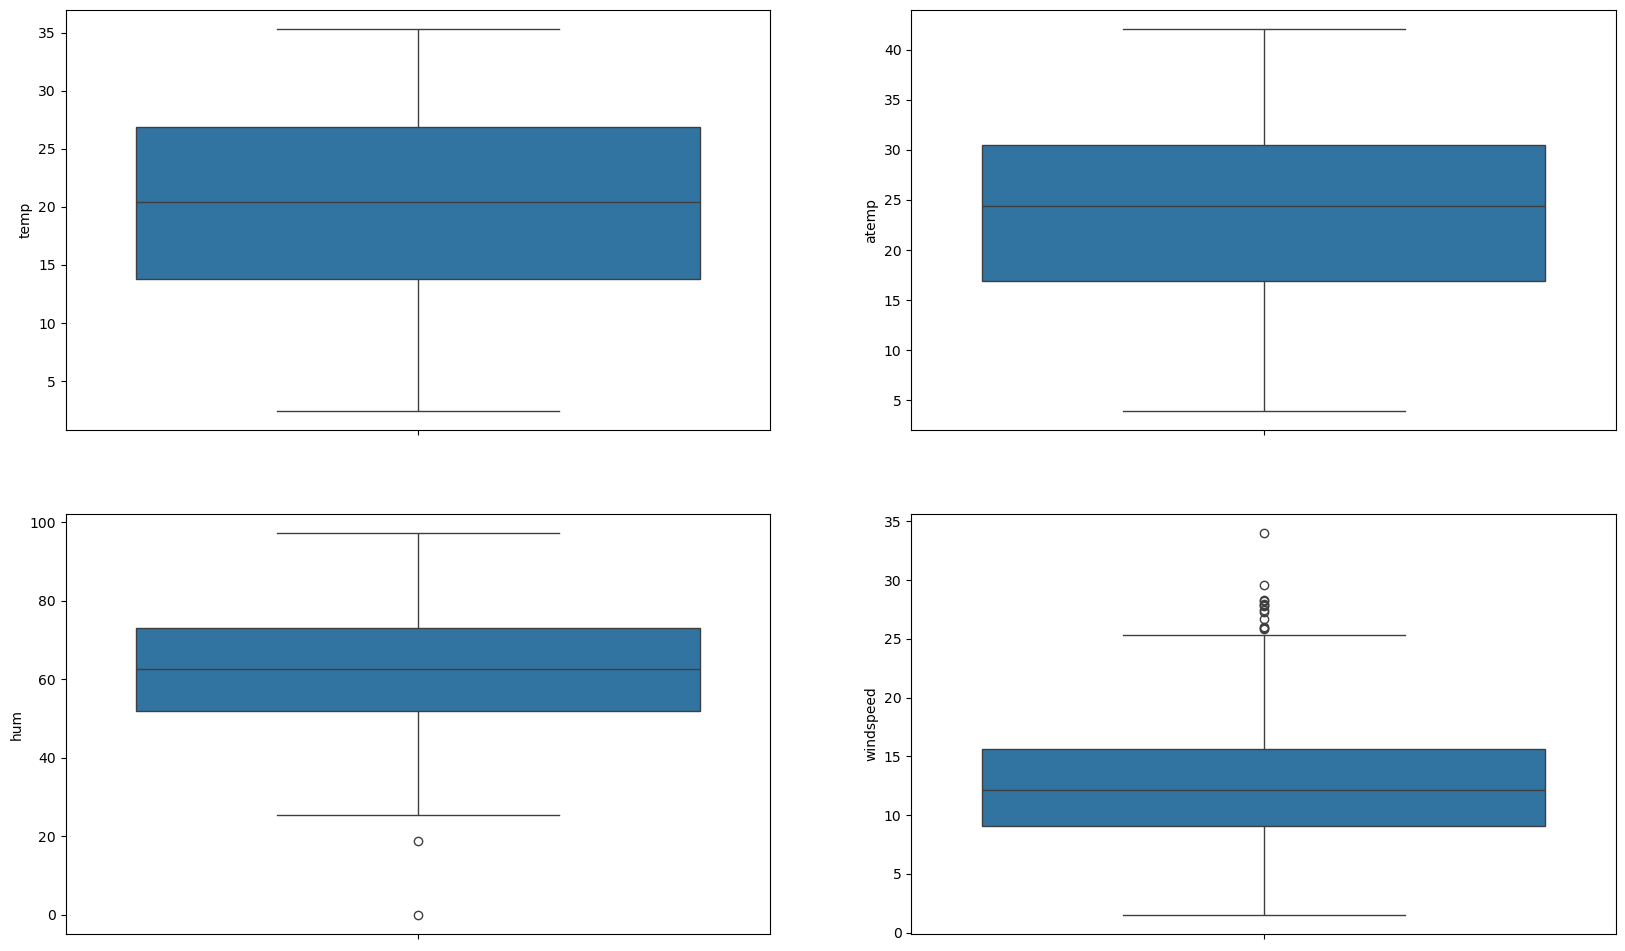

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(y = 'temp', data = data)
plt.subplot(2,2,2)
sns.boxplot(y = 'atemp', data = data)
plt.subplot(2,2,3)
sns.boxplot(y = 'hum', data = data)
plt.subplot(2,2,4)
sns.boxplot(y = 'windspeed', data = data)

- There seems to be some outliers in windspeed but other variables are looking good

<Axes: xlabel='dayspassed', ylabel='cnt'>

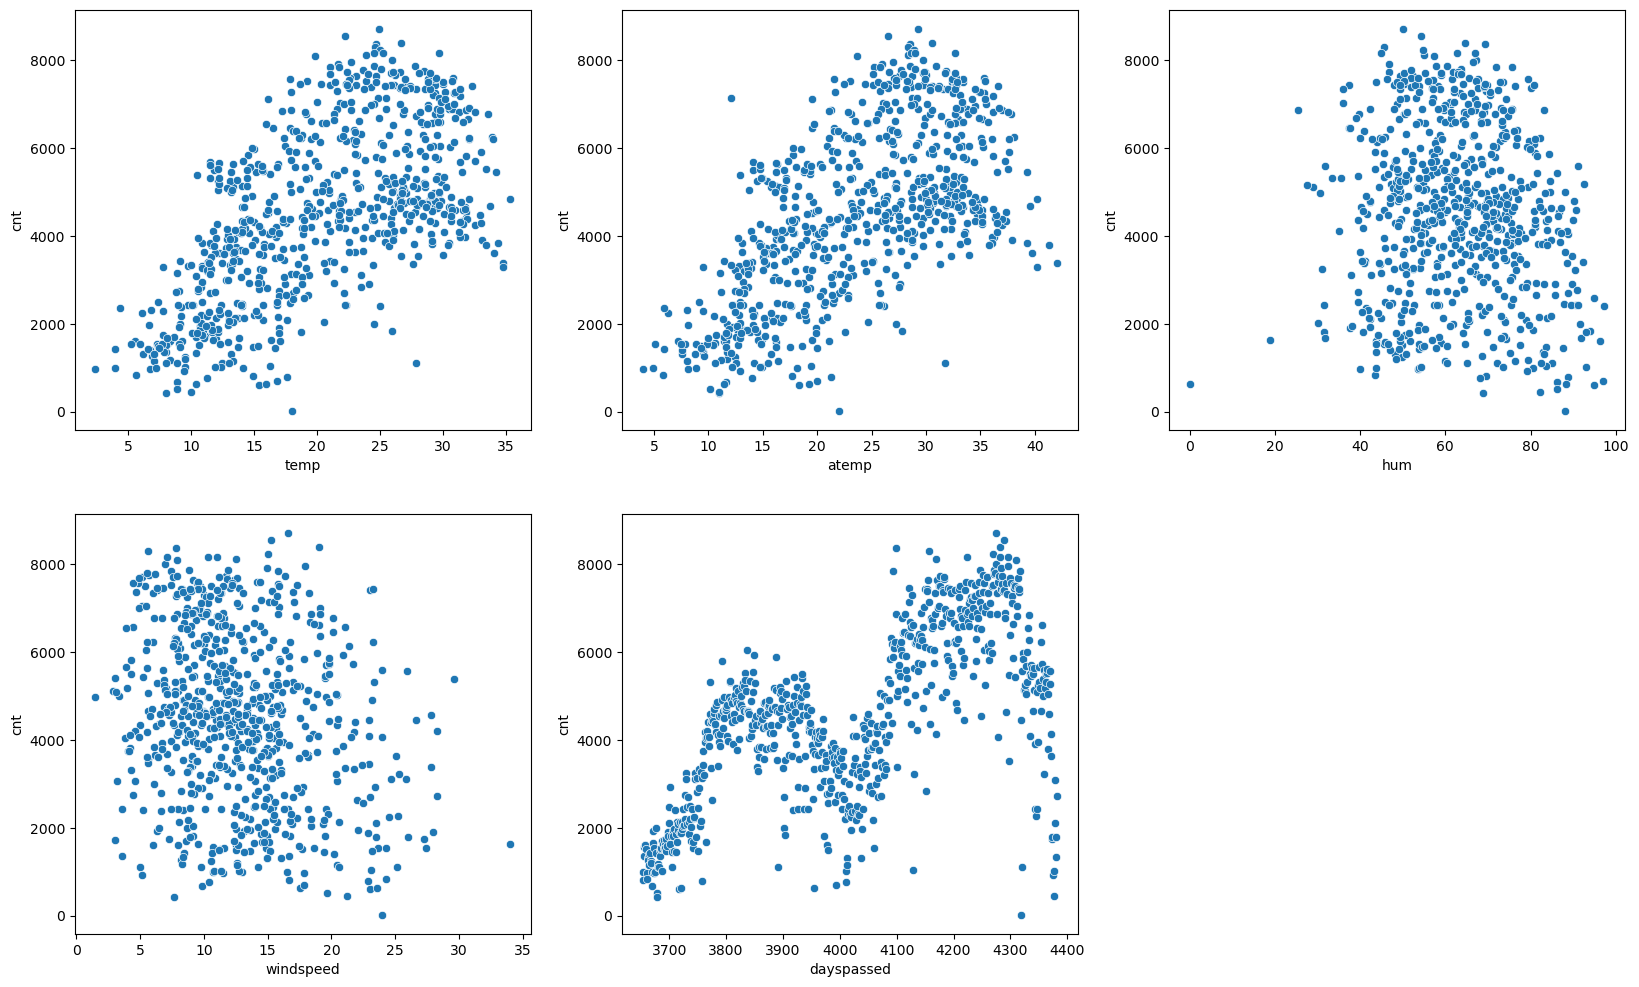

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.scatterplot(x='temp',y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.scatterplot(x='atemp',y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.scatterplot(x='hum',y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.scatterplot(x='windspeed',y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.scatterplot(x='dayspassed',y = 'cnt', data = data)

Looking at the plot of cnt with categorical variables we can say that 
- There seems to be some possitive linear pattern of cnt with temp, atemp
- There seems to be some negative linear pattern of cnt with hum, windspeed nut its not as clear as that of temp/atemp
- We will further look at these on correlation heatmap

#### Visualising Categorical Variables

Some variables are categorical but in forms of number so lets convert them to categorical and there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [15]:

# Defining the map functions
sm = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
yrm = {0:2018, 1:2019}

wm = {1:'clear', 2:'mist_cloudy', 3:'light_snow_rain', 4:'heavy_snow_rain'}
month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep',10:'Oct', 11:'Nov', 12:'Dec'}
weekday = { 0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}

def year_map(x):
    return yrm[x]
            
def weather_map(x):
    return wm[x]

def month_map(x):
    return month[x]
    
def season_map(x):
    return sm[x] 

def weekday_map(x):
    return weekday[x] 

data["season"] = data["season"].apply(season_map)
data["year"] = data["yr"].apply(year_map)
data["weathersit"] = data["weathersit"].apply(weather_map)
data["mnth"] = data["mnth"].apply(month_map)
data["weekday"] = data["weekday"].apply(weekday_map)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  cnt         730 non-null    int64         
 14  dayspassed  730 non-null    int64         
 15  year        730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,dayspassed,year
0,1,2018-01-01,spring,0,Jan,0,Sat,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,3653,2018
1,2,2018-01-02,spring,0,Jan,0,Sun,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,3654,2018
2,3,2018-01-03,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,3655,2018
3,4,2018-01-04,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,3656,2018
4,5,2018-01-05,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,3657,2018


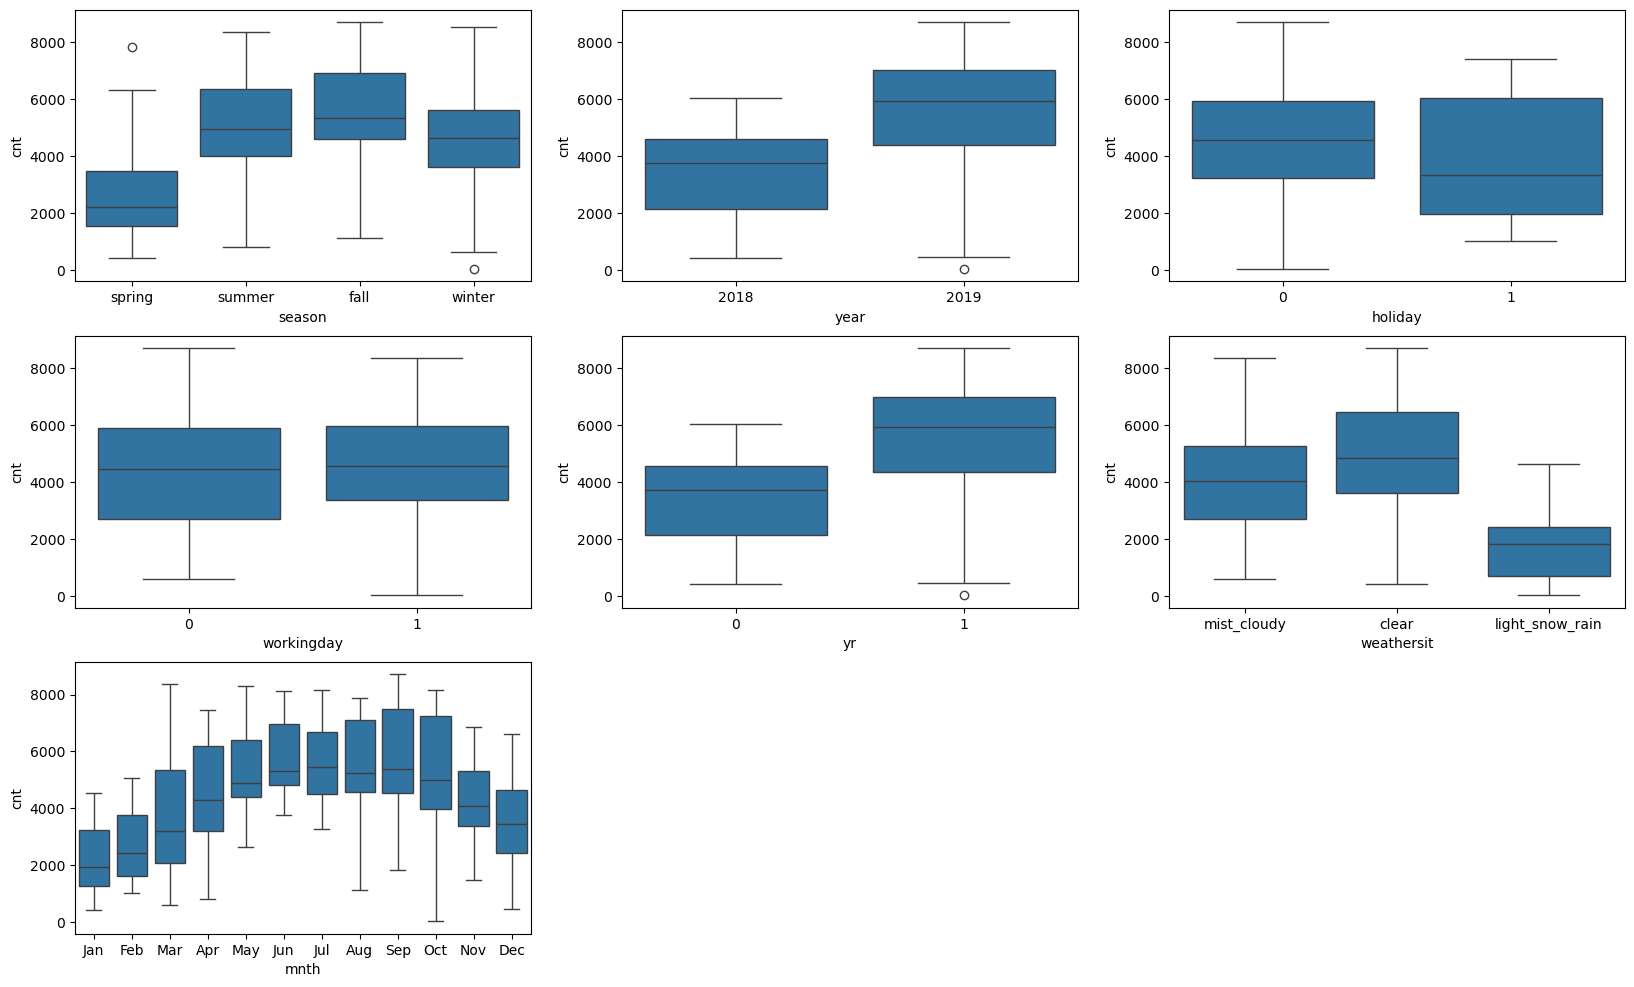

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)

plt.show()


Looking at the plot of cnt with categorical variables we can say that 
- The season seems to have good impact on bike rental with lower demand in spring
- Then rental has significantly improved in 2019 so we should also check line chart for each month to see if there is any linear pattern
- When its not a holiday the rental is higher
- On a working day the rental is slightly higer
- Looking at weathersit we can say, the clearer the weather the number of rental increase
- We will further look at these on correlation heatmap
- There are no outliers for the categorical variables

<Axes: xlabel='mnth', ylabel='cnt'>

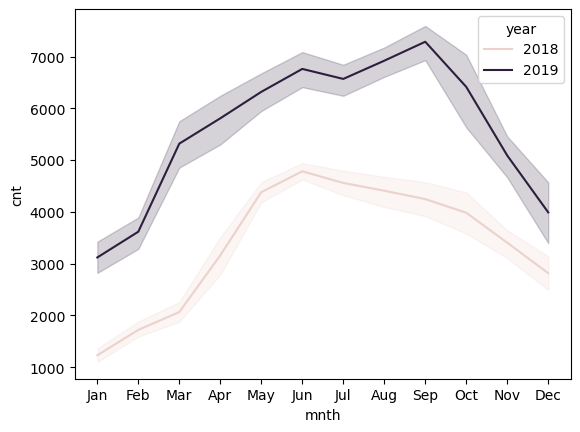

In [19]:
sns.lineplot(data=data, x="mnth", y="cnt", hue='year')

- There is significant increase in rental in 2019 for each month as compared with 2018.

## Step 3: Data Preparation

### Dummy Variables

In [20]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'd1'
d1 = pd.get_dummies(data['season'], drop_first = True,dtype=int)

In [21]:
d1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [22]:
data_with_d = pd.concat([data, d1], axis = 1)

In [23]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'd2'
d2 = pd.get_dummies(data['weathersit'], drop_first = True,dtype=int)

In [24]:
d2.head()

,light_snow_rain,mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [25]:
data_with_d = pd.concat([data, d2], axis = 1)

In [26]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,dayspassed,year
0,1,2018-01-01,spring,0,Jan,0,Sat,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,3653,2018
1,2,2018-01-02,spring,0,Jan,0,Sun,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,3654,2018
2,3,2018-01-03,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,3655,2018
3,4,2018-01-04,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,3656,2018
4,5,2018-01-05,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,3657,2018


In [27]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'd1'
d3 = pd.get_dummies(data['mnth'], drop_first = True,dtype=int)

In [28]:
d3.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [29]:
data_with_d = pd.concat([data_with_d, d3], axis = 1)

In [30]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'd1'
d4 = pd.get_dummies(data['weekday'], drop_first = True,dtype=int)

In [31]:
d4.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [32]:
data_with_d = pd.concat([data_with_d, d4], axis = 1)

In [33]:
data_with_d.drop(['season'], axis = 1, inplace = True)
data_with_d.drop(['weathersit'], axis = 1, inplace = True)
data_with_d.drop(['mnth'], axis = 1, inplace = True)
data_with_d.drop(['weekday'], axis = 1, inplace = True)

In [34]:
data_with_d.drop(['instant'], axis = 1, inplace = True)
data_with_d.drop(['dteday'], axis = 1, inplace = True)
data_with_d.drop(['year'], axis = 1, inplace = True)

In [35]:
#Lets move the target variable to last position, this will help us read the correlation map 
last_column = data_with_d.pop('cnt') 
  
# insert column using insert(position,column_name, 
# first_column) function 
data_with_d.insert(data_with_d.shape[1], 'cnt', last_column) 

In [36]:
data_with_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   dayspassed       730 non-null    int64  
 8   light_snow_rain  730 non-null    int32  
 9   mist_cloudy      730 non-null    int32  
 10  Aug              730 non-null    int32  
 11  Dec              730 non-null    int32  
 12  Feb              730 non-null    int32  
 13  Jan              730 non-null    int32  
 14  Jul              730 non-null    int32  
 15  Jun              730 non-null    int32  
 16  Mar              730 non-null    int32  
 17  May             

In [37]:
data_with_d.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,dayspassed,light_snow_rain,mist_cloudy,...,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,cnt
0,0,0,0,14.110847,18.18125,80.5833,10.749882,3653,0,1,...,0,0,0,0,1,0,0,0,0,985
1,0,0,0,14.902598,17.68695,69.6087,16.652113,3654,0,1,...,0,0,0,0,0,1,0,0,0,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,3655,0,0,...,0,0,0,1,0,0,0,0,0,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3656,0,0,...,0,0,0,0,0,0,0,1,0,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,3657,0,0,...,0,0,0,0,0,0,0,0,1,1600


## Step 4: Splitting the Data into Training and Testing Sets


In [38]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data_with_d, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
# Apply scaler() to all the columns except the 'yes-no(1-0)' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [42]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,dayspassed,light_snow_rain,mist_cloudy,...,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,4020.941176,0.029412,0.343137,...,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,209.868619,0.169124,0.475223,...,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3653.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3839.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4025.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,4205.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4381.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


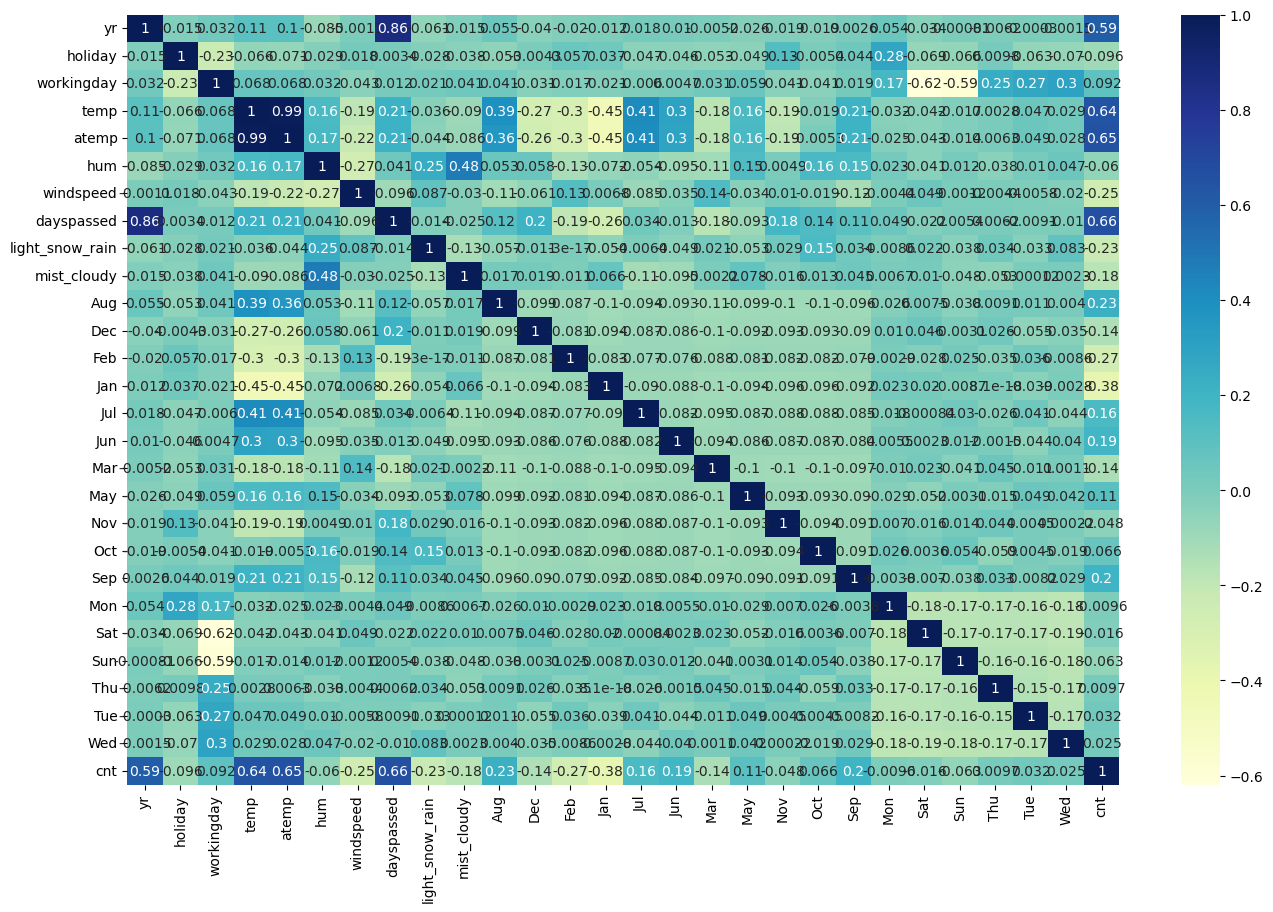

In [43]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- As we can see temp and atemp are highly correlated so we should drop one of them
- As we can see year,temp, atemp have correlation more then .5 and spring has  -0.56 with cnt
- Also Spring has < -0.5 negative correlation with temp, atemp

In [44]:
df_train.drop(['temp'], axis = 1, inplace = True)

### Dividing into X and Y sets for the model building

In [45]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

We will create the first model with all the variables and then will check their p values and VIF to remove the variables

In [46]:
# Importing RFE and LinearRegression
#from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

#rfe = RFE(lm, n_features_to_select=20)             # running RFE
#rfe = rfe.fit(X_train, y_train)

LinearRegression()

In [48]:
#list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [49]:
#Instead of creating with only 20 columns lets create the model with all the columns
#X_train.columns[rfe.support_]

### Building model using statsmodel, for the detailed statistics

In [50]:
import statsmodels.api as sm
def createModel(y_train,X_train):
    X_train_rfe = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train_rfe).fit()   
    return lm

In [51]:
def max_p_value(pv):
    maxk = None 
    maxv=0.05
    for key in pv.keys():
        if(key!='const' and maxv<=pv[key]):
            maxk=key
            maxv=pv[key]
    return maxk
           

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculateVIF(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif.sort_values(by = "VIF", ascending = False,inplace = True)
    print(vif)
    return vif

## Order of removal of variables
- Remove variable with High p-value and High VIF
- Remove variable with High p-value and Low VIF
- Remove variable with Low  p-value and High VIF
- If no such variable is found then stop

In [53]:
def createModelAndOptimize(y_train,X_train):
    X_train = X_train
    lm = createModel(y_train,X_train)
    print(lm.summary())
    coltodrop=max_p_value(lm.pvalues)
    print("---------------coltodrop due to PValue----------------",coltodrop)
    #High p-value
    if(coltodrop!=None): 
        X_train.drop(coltodrop, axis = 1, inplace = True)
        lm=createModelAndOptimize(y_train,X_train)
    else:
        vif=calculateVIF(X_train)
        print("---------------coltodrop due to VIF----------------",vif["Features"].iloc[0])
        if(vif["VIF"].iloc[0]>=5):
            X_train.drop(vif["Features"].iloc[0], axis = 1, inplace = True)
            lm=createModelAndOptimize(y_train,X_train)
    return lm    

In [54]:
lm=createModelAndOptimize(y_train,X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     99.06
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.51e-172
Time:                        15:40:54   Log-Likelihood:                 500.32
No. Observations:                 510   AIC:                            -948.6
Df Residuals:                     484   BIC:                            -838.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4995      1.412     

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [55]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     162.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          9.02e-157
Time:                        15:40:55   Log-Likelihood:                 426.77
No. Observations:                 510   AIC:                            -829.5
Df Residuals:                     498   BIC:                            -778.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5130      0.016     31.953      0.000       0.481       0.545
yr                  0.2485      0.009     26.342      0.000       0.230       0.267
workingday          0.0649      0.013      5.050      0.000       0.040       0.090
windspeed          -0.2249      0.029     -7.861      0.000      -0.281      -0.169
light_snow_rain    -0.3070      0.028    -10.855      0.000      -0.363      -0.251
mist_cloudy        -0.0868      0.010     -8.650      0.000      -0.107      -0.067
Dec                -0.1673      0.017     -9.632      0.000      -0.201      -0.133
Feb                -0.2654      0.019    -13.678      0.000      -0.304      -0.227
Jan                -0.3367      0.017    -19.758      0.000      -0.370      -0.303
Mar                -0.1465      0.016     -8.931      0.000      -0.179      -0.114
Sep                 0.0771      0.018      4.330      0.000       0.042       0.112
Sat                 0.0722      0.017      4.343      0.000       0.040       0.105
==============================================================================
Omnibus:                       76.512   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.302
Skew:                          -0.760   Prob(JB):                     6.42e-43
Kurtosis:                       5.614   Cond. No.                         9.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## High value of F-statics means overall model is a good fit.

In [56]:
y_train_cnt = lm.predict(sm.add_constant(X_train))

Text(0.5, 0, 'Errors')

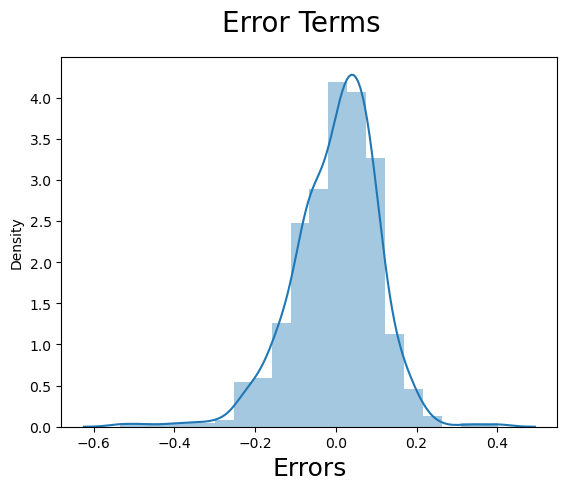

In [57]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

In [58]:
#### Applying the scaling on the test sets

In [59]:
#We will only transform as fit is already done on train data
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [60]:
df_test.drop(['temp'], axis = 1, inplace = True)
#df_test.drop(['holiday'], axis = 1, inplace = True)
#df_test.drop(['weekday'], axis = 1, inplace = True)

#### Dividing into X_test and y_test

In [61]:
y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
# Creating X_test_new dataframe by dropping variables from X_test
l=lm.pvalues.keys().tolist()
l.remove('const')
X_test_new = X_test[l]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [63]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

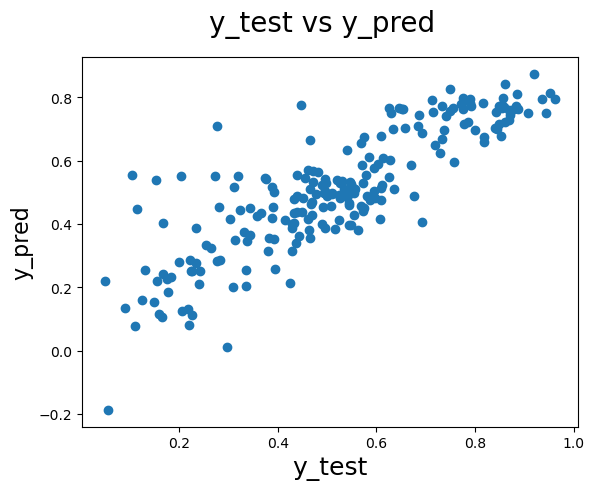

In [64]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [65]:
y_pred.shape

(219,)

In [66]:
y_test.shape

(219,)

Text(0, 0.5, 'Cnt')

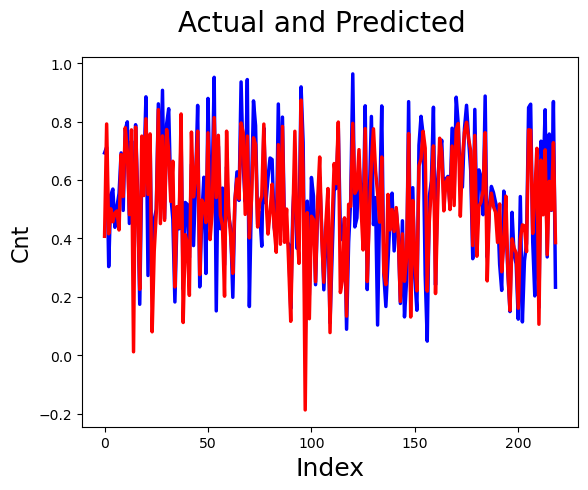

In [67]:
#Actual vs Predicted
c = [i for i in range(0,y_pred.shape[0],1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Cnt', fontsize=16)                               # Y-label

Text(0, 0.5, 'Test - Pred')

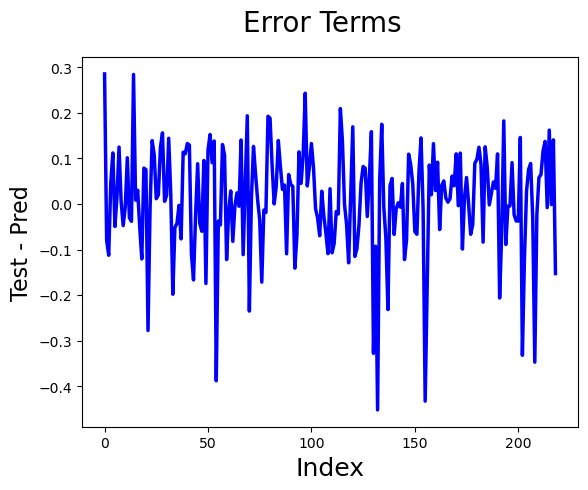

In [68]:
# Error terms
c = [i for i in range(0,y_pred.shape[0],1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Test - Pred', fontsize=16)                # Y-label

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [70]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.013536193732290954
r_square_value : 0.7150023494818627


## Summary of the above model

- The model has R2 of .78 which is decent
- The model has Adjusted r2 also similar to R2 so there is no extra variable
- The value of R2 for test data is 0.71 which is close to value of test data. So the model is not overfit.
- The Error terms are randomly distributed
- But the plot of Actual v/s Predicted is not a prefect fit
- In the above model does not include month it relies on season and other variables but the month wise graph shows that month has significant impact. Lets do the analysis by converting month as a dummy variable
 

## Which variables are significant in predicting the demand for shared bikes.
- The rental seems to be increasing with year. So we can expect next year to have more demant for bike rental. This seems to be because the covid situation is improving.
- A working day has positive impact on rental which means our users might be people using the bike to go to office.
- On a day with high windspeed, snow and rain, cloudy  the rental is impacted negatively. Users might be using cars or public conveyance on such days.
- The months of Dec, Feb, Jan and Mar have negative impact on rental.
- The month of Sep has a positive impact on rental.
- Sat has a positive impact on rental.

## How well those variables describe the bike demand

yr 0.2485 <BR>
workingday 0.0649 <BR>
windspeed -0.2242 <BR>
light_snow_rain -0.3070<BR>
mist_cloudy -0.0868<BR>
Dec -0.1673<BR>
Feb-0.2654<BR>
Jan-0.3367<BR>
Mar -0.1465<BR>
Sep 0.077S<BR>
Sat 0.0722<BR>
